# DAT405/DIT407 Introduction to Data Science and AI 
## 2022-2023, Reading Period 4
## Assignment 4: Spam classification using Naïve Bayes 

Authors: Kevin To and Filip Cederqvist

Work load: 13 h each

The exercise takes place in this notebook environment.
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.

**What to submit:** 
Convert the notebook to a pdf-file and submit it. Make sure all cells are executed so all your code and its results are included. Double check the pdf displays correctly before you submit it.

In [1]:
# Download and extract data
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
# !tar -xjf 20021010_easy_ham.tar.bz2
# !tar -xjf 20021010_hard_ham.tar.bz2
# !tar -xjf 20021010_spam.tar.bz2

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [2]:
# !ls -lah

## 1. Preprocessing: 

##### 1.1 Look at a few emails from easy_ham, hard_ham and spam. Do you think you would be able to classify the emails just by inspection? How do you think a succesful model can learn the difference between the different classes of emails?


In [3]:
import os
import pandas as pd

easy_ham_files = os.listdir('./datasets/easy_ham/')
hard_ham_files = os.listdir('./datasets/hard_ham/')
spam_files = os.listdir('./datasets/spam/')

easy_ham = []
hard_ham = []
spam = []

# Putting all the mails in a list of dictionaries for easy conversion to dataframe in the future
for file in easy_ham_files:
  f = open('./datasets/easy_ham/' + file,  encoding = "ISO-8859-1")
  easy_ham.append({"msg": f.read(), "label": "ham"})

for file in hard_ham_files:
  f = open('./datasets/hard_ham/' + file,  encoding = "ISO-8859-1")
  hard_ham.append({"msg": f.read(), "label": "ham"})

for file in spam_files:
  f = open('./datasets/spam/' + file,  encoding = "ISO-8859-1")
  spam.append({"msg": f.read(), "label": "spam"})

msg_easy_ham = list(easy_ham[0].values())[0]
msg_hard_ham = list(hard_ham[0].values())[0]
msg_spam = list(spam[0].values())[0]

print(msg_easy_ham)
print("-"*50 + "NEW MAIL" + "-"*50)
print(msg_hard_ham)
print("-"*50 + "NEW MAIL" + "-"*50)
print(msg_spam)


From rssfeeds@jmason.org  Mon Sep 30 13:43:46 2002
Return-Path: <rssfeeds@example.com>
Delivered-To: yyyy@localhost.example.com
Received: from localhost (jalapeno [127.0.0.1])
	by jmason.org (Postfix) with ESMTP id AE79816F16
	for <jm@localhost>; Mon, 30 Sep 2002 13:43:46 +0100 (IST)
Received: from jalapeno [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Mon, 30 Sep 2002 13:43:46 +0100 (IST)
Received: from dogma.slashnull.org (localhost [127.0.0.1]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g8U81fg21359 for
    <jm@jmason.org>; Mon, 30 Sep 2002 09:01:41 +0100
Message-Id: <200209300801.g8U81fg21359@dogma.slashnull.org>
To: yyyy@example.com
From: gamasutra <rssfeeds@example.com>
Subject: Priceless Rubens works stolen in raid on mansion
Date: Mon, 30 Sep 2002 08:01:41 -0000
Content-Type: text/plain; encoding=utf-8
Lines: 6
X-Spam-Status: No, hits=-527.4 required=5.0
	tests=AWL,DATE_IN_PAST_03_06,T_URI_COUNT_0_1
	version=2.50-cvs
X-Spam

Answer 1.1: We think we would be able to classify the mails by looking at them but it would take a long time. We think a model could classify the mails successfully to some degree, but some not with 100% accuracy

##### 1.2 Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use only the easy_ham part as ham data for quesions 1 and 2.

In [4]:
# Converting list to dataframe
df_easy_ham = pd.DataFrame(easy_ham)
df_hard_ham = pd.DataFrame(hard_ham)
df_spam = pd.DataFrame(spam)

df = pd.concat([df_easy_ham, df_hard_ham, df_spam], ignore_index=True)

print('# of Easy_Ham Mails:', + len(df_easy_ham))
print('# of Hard_Ham Mails:', + len(df_hard_ham))
print('# of Spam Mails:', + len(df_spam))
df.sample(5)

# of Easy_Ham Mails: 2551
# of Hard_Ham Mails: 250
# of Spam Mails: 501


,msg,label
457,From fork-admin@xent.com Thu Sep 26 11:04:44 ...,ham
152,From fork-admin@xent.com Wed Aug 28 10:50:41 ...,ham
3193,From mortgage_quotes_fast@nationwidemortgage.u...,spam
1561,From rssfeeds@jmason.org Thu Oct 10 12:32:34 ...,ham
1932,From quinlan@pathname.com Wed Aug 28 10:45:34...,ham


### 2.1 Write a Python program that: 
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. Use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def data(df_ham, df_spam):
    # Splitting the data into train and test 
    hamtrain, hamtest = train_test_split(df_ham, test_size=0.3, random_state=0)
    spamtrain, spamtest = train_test_split(df_spam, test_size=0.3, random_state=0)

    # Merging the train and test dataframes
    X_train = pd.concat([hamtrain, spamtrain], ignore_index=True)
    X_test = pd.concat([hamtest, spamtest], ignore_index=True)

    # Shuffling the data
    X_train = X_train.sample(frac=1).reset_index(drop=True)
    X_test = X_test.sample(frac=1).reset_index(drop=True)

    # Assigning the labels to y_train and y_test
    y_train = X_train.label
    y_test = X_test.label

    X_train = X_train.msg
    X_test = X_test.msg

    return X_train, X_test, y_train, y_test

In [7]:
def train_model(X_train, y_train, X_test, y_test, vect, model):
    # vectorize the text
    vect.fit(X_train)

    # transform the text into matrixes
    X_train_vector = vect.transform(X_train)
    X_test_vector = vect.transform(X_test)

    # Train the model
    model.fit(X_train_vector, y_train)
    y_pred = model.predict(X_test_vector)
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    
    return cm, TN, FN, TP, FP, acc

In [8]:
def plot_cm(MNB_cm, BNB_cm, mTP, mFN, mTN, mFP, MNM_acc, bTP, bFN, bTN, bFP, BNB_acc):
    # Visualizing the confusion matrix
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(12, 4)
    labels=['Spam', 'Not Spam']

    sns.heatmap(MNB_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues", ax=ax[0])
    ax[0].set_ylabel('Predicted')
    ax[0].set_xlabel('Actual')
    ax[0].set_title('Multinomial')

    sns.heatmap(BNB_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues", ax=ax[1])
    ax[1].set_ylabel('Predicted')
    ax[1].set_xlabel('Actual')
    ax[1].set_title('Bernoulli')

    # Scores TPR = TP/TP+FN, TNR = TN/FP+TN
    print('Multinomial Accuracy: ', round(MNM_acc,3), "%")
    print('True Spam: ', round(mTP /(mFP+mTP),3))
    print('True Ham: ', round(mTN /(mTN+mFN),3))

    print('\nBernoulli Accuracy: ', round(BNB_acc,3), "%") 
    print('True Spam: ', round(bTP /(bFP+bTP),3))
    print('True Ham: ', round(bTN /(bTN+bFN),3))

Easy Ham VS Spam with only easy ham training data 

Multinomial Accuracy:  0.977 %
True Spam:  1.0
True Ham:  0.861

Bernoulli Accuracy:  0.903 %
True Spam:  1.0
True Ham:  0.411


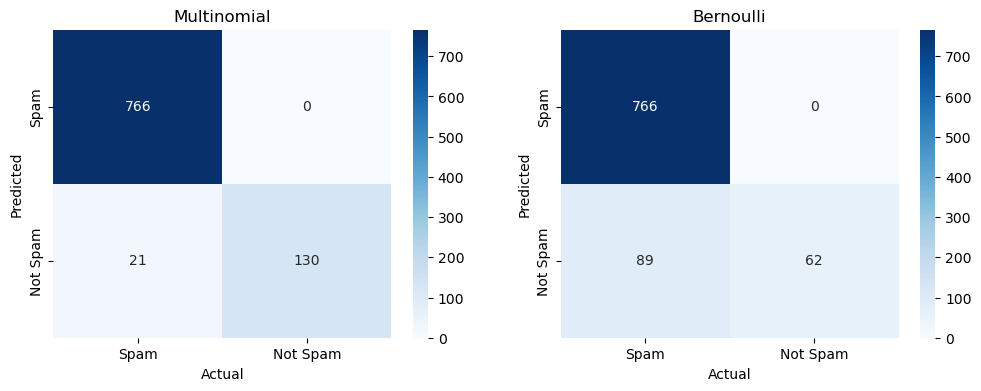

In [9]:
MNB_model = MultinomialNB()
BNB_model = BernoulliNB()
vect = CountVectorizer()

X_train, X_test, y_train, y_test = data(df_easy_ham, df_spam)

MNB_cm, mTP, mFN, mTP, mFP, m_acc = train_model(X_train, y_train, X_test, y_test, vect, MNB_model)
BNB_cm, bTP, bFN, bTP, bFP, b_acc = train_model(X_train, y_train, X_test, y_test, vect, BNB_model)

print("Easy Ham VS Spam with only easy ham training data \n")

plot_cm(MNB_cm, BNB_cm, mTP, mFN, mTP, mFP, m_acc, bTP, bFN, bTP, bFP, b_acc)


### 2.2) Answer the following questions:

##### a) What does the CountVectorizer do?
CountVectorizer converts the text strings into a matrix the have words as coulums and files as rows, where each cell is the cont of a word within the text file. 

##### b) What is the difference between Multinomial Naive Bayes and Bernoulli Naive Bayes
From the confusion matrixes, we can also note that the Multinomial Naive Bayes classifier performs better than the Bernoulli Naive Bayes classifier, as it doesn't missclassify as much spam emails while also having a higher accuracy score. However, it is worth noting that both classifiers are good at classifying ham, e.g non-spam, emails, as they both have equally high true positive rate.

A difference between the classifiers is that Bernoulli Naive Bayes can be viewed as binary where it only cares if a word is used or not in the file, whereas the Mulitnomial Navie Bayes takes into account how many times each word is used. 


### 3.1 Run the two models:
Run (don't retrain) the two models from Question 2 on spam versus hard-ham. Does the performance differ compared to question 2 when the model was run on spam versus easy-ham? If so, why?

In [10]:
# Gettig relevant data
X_train, X_test, y_train, y_test = data(df_hard_ham, df_spam)

# transform the text into matrixes
X_train_vector = vect.transform(X_train)
X_test_vector = vect.transform(X_test)

# Using models that were trained on easy ham and spam
MNB_pred = MNB_model.predict(X_test_vector)
BNB_pred = BNB_model.predict(X_test_vector)

# Accuracy
MNB_acc = accuracy_score(y_test, MNB_pred)
BNB_acc = accuracy_score(y_test, BNB_pred)

# Confusion Matrix
MNB_cm = confusion_matrix(y_test, MNB_pred)
BNB_cm = confusion_matrix(y_test, BNB_pred)

mTN = MNB_cm[0][0]
mFN = MNB_cm[1][0]
mTP = MNB_cm[1][1]
mFP = MNB_cm[0][1]
    
bTN = BNB_cm[0][0]
bFN = BNB_cm[1][0]
bTP = BNB_cm[1][1]
bFP = BNB_cm[0][1]

Hard Ham VS Spam with only easy ham training data 

Multinomial Accuracy:  0.699 %
True Spam:  0.734
True Ham:  0.861

Bernoulli Accuracy:  0.416 %
True Spam:  0.59
True Ham:  0.411


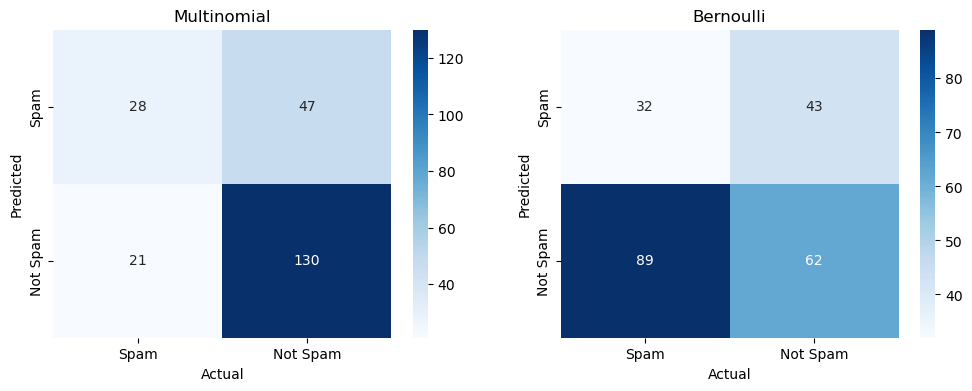

In [11]:
print("Hard Ham VS Spam with only easy ham training data \n")

plot_cm(MNB_cm, BNB_cm, mTP, mFN, mTP, mFP, MNB_acc, bTP, bFN, bTP, bFP, BNB_acc)

##### Answer 3.1:
When the same models is used, but the data is changed to Spam and Hard ham, the overall performance drops. A reason for this is that the Hard Ham emails are more similar to spam emails than easy ham emails. Seeing as the previous model was trained on only easy ham emails, it is not difficult to see why it performs much worse.

### 3.2 Retrain
Retrain new Multinomial and Bernolli Naive Bayes classifers on the combined (easy+hard) ham and spam. Now evaluate on spam versus hard-ham as in 3.1. Also evaluate on spam versus easy-ham. Compare the performance with question 2 and 3.1. What do you observe?

In [12]:
MNB_model = MultinomialNB()
BNB_model = BernoulliNB()
new_vect = CountVectorizer()

# Merging easy and hard ham
df_easy_hard = pd.concat([df_easy_ham, df_hard_ham], ignore_index=True)
df_easy_hard = df_easy_hard.sample(frac=1).reset_index(drop=True)

X_train, X_test, y_train, y_test = data(df_easy_hard, df_spam)

# Training the new models with easy and hard ham + spam
_ = train_model(X_train, y_train, X_test, y_test, new_vect, MNB_model)
_ = train_model(X_train, y_train, X_test, y_test, new_vect, BNB_model)


Hard Ham VS Spam with easy and hard ham training data
Multinomial Accuracy:  0.916 %
True Spam:  1.0
True Ham:  0.874

Bernoulli Accuracy:  0.469 %
True Spam:  0.97
True Ham:  0.212


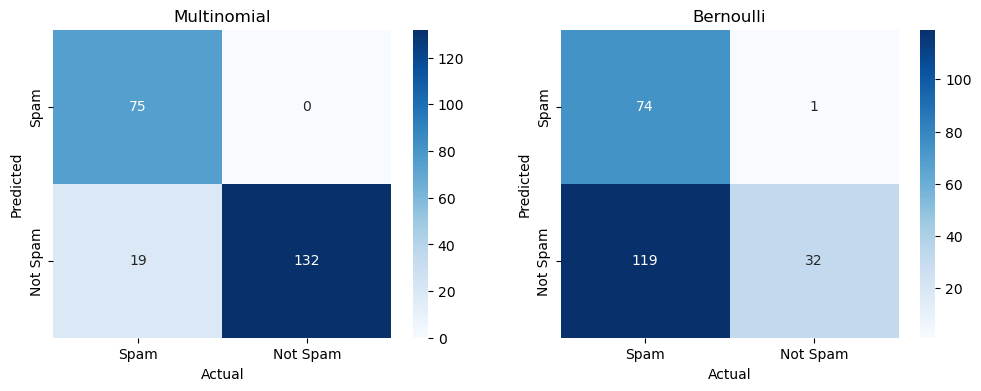

In [13]:
# Spam vs hard ham
X_train, X_test, y_train, y_test = data(df_hard_ham, df_spam)

# transform the text into matrixes
X_train_vector = new_vect.transform(X_train)
X_test_vector = new_vect.transform(X_test)

# Using models that were trained on easy ham and spam
MNB_pred = MNB_model.predict(X_test_vector)
BNB_pred = BNB_model.predict(X_test_vector)

MNB_acc = accuracy_score(y_test, MNB_pred)
BNB_acc = accuracy_score(y_test, BNB_pred)

# Confusion Matrix
MNB_cm = confusion_matrix(y_test, MNB_pred)
BNB_cm = confusion_matrix(y_test, BNB_pred)

mTN = MNB_cm[0][0]
mFN = MNB_cm[1][0]
mTP = MNB_cm[1][1]
mFP = MNB_cm[0][1]
    
bTN = BNB_cm[0][0]
bFN = BNB_cm[1][0]
bTP = BNB_cm[1][1]
bFP = BNB_cm[0][1]

print("Hard Ham VS Spam with easy and hard ham training data")
plot_cm(MNB_cm, BNB_cm, mTP, mFN, mTP, mFP, MNB_acc, bTP, bFN, bTP, bFP, BNB_acc)


##### Answer 3.2a:

When comparing the performance of the new model, which is trained on both easy and hard ham emails, to the result in 3.1, we can see that the performance increases massively for the Multinomial model, from 0.70% to 0.916%. However, for the Bernoulli model we don't see a big difference as the performance only increases from 0.416% to 0.478%. Looking at the confusion matrix for the Bernoulli model, we can see that it is better at detecting true spam, while being worse at detecting true ham. 

A conclusion we can draw from this is that the Multinomial model benefits greatly from being trained on both easy and hard ham emails. This is not the case with the Bernoulli model. Instead, it has a more difficult time distinguishing between ham and spam emails when trained on both easy and hard ham emails.

Easy Ham VS Spam with easy and hard ham training data 

Multinomial Accuracy:  0.979 %
True Spam:  1.0
True Ham:  0.874

Bernoulli Accuracy:  0.87 %
True Spam:  1.0
True Ham:  0.212


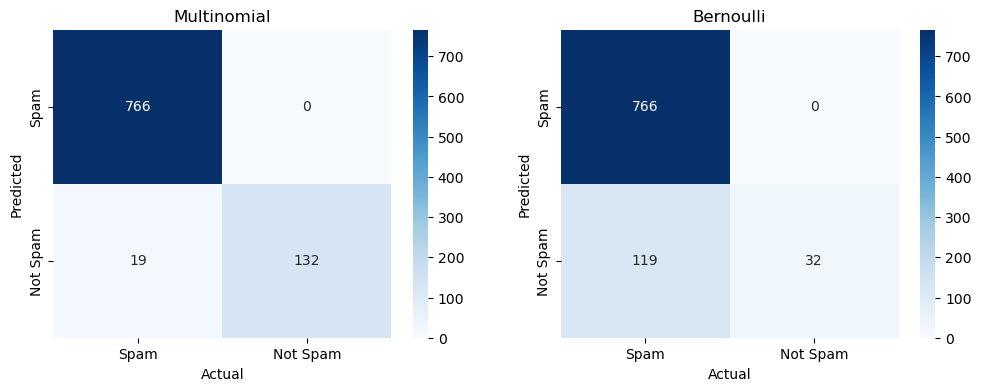

In [14]:
# Spam vs easy ham
X_train, X_test, y_train, y_test = data(df_easy_ham, df_spam)

# transform the text into matrixes
X_train_vector = new_vect.transform(X_train)
X_test_vector = new_vect.transform(X_test)

# Using models that were trained on easy ham and spam
MNB_pred = MNB_model.predict(X_test_vector)
BNB_pred = BNB_model.predict(X_test_vector)

MNB_acc = accuracy_score(y_test, MNB_pred)
BNB_acc = accuracy_score(y_test, BNB_pred)

# Confusion Matrix
MNB_cm = confusion_matrix(y_test, MNB_pred)
BNB_cm = confusion_matrix(y_test, BNB_pred)

mTN = MNB_cm[0][0]
mFN = MNB_cm[1][0]
mTP = MNB_cm[1][1]
mFP = MNB_cm[0][1]
    
bTN = BNB_cm[0][0]
bFN = BNB_cm[1][0]
bTP = BNB_cm[1][1]
bFP = BNB_cm[0][1]

print("Easy Ham VS Spam with easy and hard ham training data \n")
plot_cm(MNB_cm, BNB_cm, mTP, mFN, mTP, mFP, MNB_acc, bTP, bFN, bTP, bFP, BNB_acc)

##### Answer 3.2b: 

In the second case, where we compare the result from Q2 (easy ham VS spam with only easy ham training data) to Q3.2, we can't see mcuh of a difference from neither models. The accuracy for Multinomial model is pretty much the same, changing from 0.977% to 0.979%. For the Bernoulli model, the accuracy actually decreases from 0.903% to 0.869%. This is not that difficult to explain, as in Q2, the Bernoulli model is only trained on easy ham emails. In Q3.2 it is trained on hard ham emails as well, which are more similar to spam emails than easy ham emails. Therefore, it is likely that the model is more confused when it comes to classifying spam emails.

### 3.3 Further improvements
Do you have any suggestions for how performance could be further improved? You don't have to implement them, just present your ideas.

##### Answer 3.3: 
To make the models perform even better, we suggest to remove all unnecessary information in the emails such as headers and footers. If these sections were removed, it would make the model more accurate, as it will only focus on the actual content of the emails. Furthermore, another idea is to remove all words that are not relevant to the classification, such as "filling words" like "the", "a", "an", etc. This would also make the model more accurate, as it would only focus on the words that are relevant to the classification.